# EIA 923 Petroleum Coke Emissions Visualization
Visualizes emission patterns among petroleum coke suppliers, as well as correlation between sulfur and ash emissions over the 2020 period

# Setup

In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
# Standard libraries
import logging
import os
import pathlib
import sys

# 3rd party libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sqlalchemy as sa

# Local libraries
import pudl

In [69]:
# Logging
logger=logging.getLogger()
logger.setLevel(logging.INFO)
handler = logging.StreamHandler(stream=sys.stdout)
formatter = logging.Formatter('%(message)s')
handler.setFormatter(formatter)
logger.handlers = [handler]

# Extract Columns from Database

In [70]:
pudl_settings = pudl.workspace.setup.get_defaults()
pudl_engine = sa.create_engine(pudl_settings["pudl_db"])
df = pudl.output.eia923.fuel_receipts_costs_eia923(pudl_engine, freq=None,
                                                   start_date='2020-01-01', end_date='2020-12-31',
                                                   fill=False, roll=False)
# filter suppliers down to petroleum coke fuel group
df = df[df['fuel_group_code'] == 'petroleum_coke']
# keep only supplier name and sulfur and ash content pct cols
df = df[["supplier_name", "sulfur_content_pct", "ash_content_pct"]]

# Scatterplots

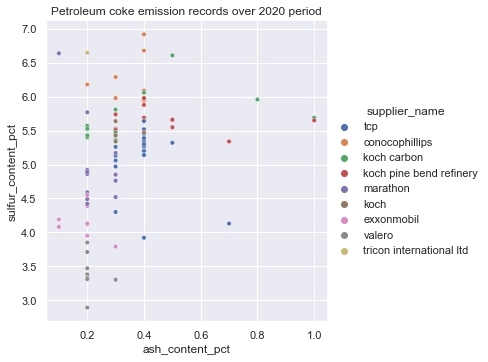

In [71]:
sns.set_theme()
pt1 = sns.relplot(data=df, x='ash_content_pct', y='sulfur_content_pct', hue='supplier_name', s=20)
pt1.set(title='Petroleum coke emission records over 2020 period')

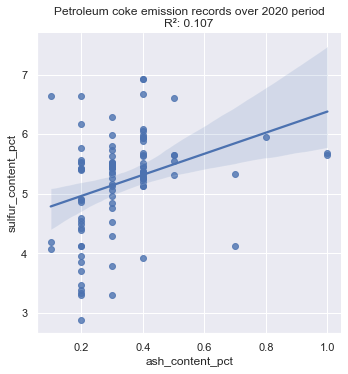

In [72]:
def r2(x, y):
    return scipy.stats.pearsonr(x, y)[0] ** 2

corrcoef = r2(df['ash_content_pct'],df['sulfur_content_pct'])
pretty_results = "R\u00b2: {}".format(round(corrcoef,3))

pt2 = sns.lmplot(data=df, x='ash_content_pct', y='sulfur_content_pct')
pt2.set(title='Petroleum coke emission records over 2020 period\n{}'.format(pretty_results))